In [1]:
import numpy as np
import math
import os
import matplotlib.pyplot as plt

## Lecture fichier fasta

In [2]:
def load_train(input_f):
    """Input 1 : a multiple sequence alignment (MSA) in FASTA format
    Output 1 : the MSA (see REMARK)
    Output 2 : the number of sequences in the MSA (MSA depth)
    """
    train_set1 = []
    
    with open(input_f) as f:
        # on lit toute les lignes du fichier texte
        lignes = f.readlines()
        # on va chercher ligne par ligne nos sequences de aa
        seq = ""
        for i in range(len(lignes)):
            # on ne prend pas en compte les lignes de commentaires commencant par >
            if lignes[i][0] == '>':
                if seq == "":
                    continue
                else :
                    train_set1.append(seq)
                    seq = ""
            # on ajoute les sequences dans une liste sans le dernier caractere
            # qui correspond au saut de ligne
            else :
                seq += (lignes[i][:(len(lignes[i])-1)])   
        train_set1.append(seq)
    # on transforme la liste en array pour que cela soit plus pratique plus tard
    train_set = np.array(train_set1)
    # m le nombre de sequences
    m = len(train_set)
    
    return train_set, m

In [3]:
train_set, m = load_train('TCF7L1/Q9Z1J1.fasta')
tcf = train_set[0]
print(tcf)
print(len(train_set[0]))

MPQLGGGRGGAGGGGGGSGAGATSGGDDLGANDELIPFQDEGGEEQEPSSDTASAQRDLDEVKSSLVNESENQSSSSDSEAERRPQPARDAFQKPRDYFAEVRRPQDGAFFKGGAYPGYPFLMIPDLSSPYLSNGPLSPGGARTYLQMKWPLLDVPSSATVKDTRSPSPAHLSNKVPVVQHPHHMHPLTPLITYSNDHFSPASPPTHLSPEIDPKTGIPRPPHPSELSPYYPLSPGAVGQIPHPLGWLVPQQGQPMYSLPPGGFRHPYPALAMNASMSSLVSSRFPHMVAPAHPGLPTSGIPHPAIVSPIVKQEPAAPSLSPAVSAKSPVTVKKEEEKKPHVKKPLNAFMLYMKEMRAKVVAECTLKESAAINQILGRKWHNLSREEQAKYYELARKERQLHAQLYPTWSARDNYGKKKKRKREKQLSQTQSQQQIQEAEGALASKSKKPCIQYLPPEKPCDSPASSHGSALDSPATPSAALASPAAPAATHSEQAQPLSLTTKPEARAQLALHSAAFLSAKAAASNSSQMGSQPPLLSRPLPLGSMPAALLTSPPTFPATLHAHQALPVLQAQPLSLVTKSAH
584


In [4]:
train_set, m = load_train('BARHL2/Q8VIB5.fasta')
barhl = train_set[0]
print(barhl)
print(len(barhl))

MTAMEGASGSSFGIDTILSGAGSGSPGMMNGDFRSLGEARTTDFRSQATPSPCSEIDTVGTAPSSPISVTLEPPEPHLVTDGPQHHHHLHHSQQPPPPSAVPAQSLQPSPQQQPPPQPQSAAQQLGSAAAAPRTSTSSFLIKDILGDSKPLAACAPYSTSVSSPHHTPKQESNAAHESFRPKLEQEDGKTKLDKREDPQSDIKCHGTKEEGDREITSSRESPPVRAKKPRKARTAFSDHQLNQLERSFERQKYLSVQDRMDLAAALNLTDTQVKTWYQNRRTKWKRQTAVGLELLAEAGNYSALQRMFPSPYFYHPSLLGSMDSTTAAAAAAAMYSSMYRTPPAPHPQLQRPLVPRVLIHGLGPGGQPALNPLSNPIPGTPHPR
384


In [5]:
# Intervalle des aa bien conservé sur le tcf
print(tcf[171:321])

LSNKVPVVQHPHHMHPLTPLITYSNDHFSPASPPTHLSPEIDPKTGIPRPPHPSELSPYYPLSPGAVGQIPHPLGWLVPQQGQPMYSLPPGGFRHPYPALAMNASMSSLVSSRFPHMVAPAHPGLPTSGIPHPAIVSPIVKQEPAAPSLS


In [20]:
# BARHL C-ter
cTer = barhl[290:]
print(cTer)
print(len(cTer))

GLELLAEAGNYSALQRMFPSPYFYHPSLLGSMDSTTAAAAAAAMYSSMYRTPPAPHPQLQRPLVPRVLIHGLGPGGQPALNPLSNPIPGTPHPR
94


## Faire des sous-séquences

In [7]:
def segments(seq, pas=50, inter =100):
    """Fonction qui coupe une sequence en plusieurs segments
    Input1 seq : une chaine peptidique
    Input2 pas : le pas entre chaque segment
    Input3 inter : taille de chaque segment
    Output1 listPos : liste contenant les positions de début et fin de chaque segment
    Output2 listSeg : liste contenant chaque segment
    """
    
    listPos = []
    listSeg = []
    for i in range(int(len(seq)/pas+1)):
        deb = i*pas
        fin = min(inter+i*pas, len(seq))
        
        listPos.append((deb,fin))
        listSeg.append(seq[deb:fin])
    return listPos, listSeg

In [24]:
# Faire des segments de TCF de taille 100 avec un pas de 50
print("    Segments de TCF de taille 100 avec un pas de 50\n\n")
listPos, listSeg = segments(tcf,50,100)

for i in range(len(listPos)):
    print("Segment%d"%(i+1),listPos[i], listSeg[i],"\n")

    Segments de TCF de taille 100 avec un pas de 50


Segment1 (0, 100) MPQLGGGRGGAGGGGGGSGAGATSGGDDLGANDELIPFQDEGGEEQEPSSDTASAQRDLDEVKSSLVNESENQSSSSDSEAERRPQPARDAFQKPRDYFA 

Segment2 (50, 150) DTASAQRDLDEVKSSLVNESENQSSSSDSEAERRPQPARDAFQKPRDYFAEVRRPQDGAFFKGGAYPGYPFLMIPDLSSPYLSNGPLSPGGARTYLQMKW 

Segment3 (100, 200) EVRRPQDGAFFKGGAYPGYPFLMIPDLSSPYLSNGPLSPGGARTYLQMKWPLLDVPSSATVKDTRSPSPAHLSNKVPVVQHPHHMHPLTPLITYSNDHFS 

Segment4 (150, 250) PLLDVPSSATVKDTRSPSPAHLSNKVPVVQHPHHMHPLTPLITYSNDHFSPASPPTHLSPEIDPKTGIPRPPHPSELSPYYPLSPGAVGQIPHPLGWLVP 

Segment5 (200, 300) PASPPTHLSPEIDPKTGIPRPPHPSELSPYYPLSPGAVGQIPHPLGWLVPQQGQPMYSLPPGGFRHPYPALAMNASMSSLVSSRFPHMVAPAHPGLPTSG 

Segment6 (250, 350) QQGQPMYSLPPGGFRHPYPALAMNASMSSLVSSRFPHMVAPAHPGLPTSGIPHPAIVSPIVKQEPAAPSLSPAVSAKSPVTVKKEEEKKPHVKKPLNAFM 

Segment7 (300, 400) IPHPAIVSPIVKQEPAAPSLSPAVSAKSPVTVKKEEEKKPHVKKPLNAFMLYMKEMRAKVVAECTLKESAAINQILGRKWHNLSREEQAKYYELARKERQ 

Segment8 (350, 450) LYMKEMRAKVVAECTLKESAAINQILGRKWHNLSREEQAKYYELARKERQLHAQLYPTWSARDNYGKK

In [25]:
# Faire des segments de BARHL de taille 50 avec un pas de 25
print("    Segments de BARHL de taille 50 avec un pas de 25\n\n")
listPos, listSeg = segments(barhl,pas = 25, inter = 50)

for i in range(len(listPos)):
    print("Segment%d"%(i+1),listPos[i], listSeg[i],"\n")

    Segments de BARHL de taille 50 avec un pas de 25


Segment1 (0, 50) MTAMEGASGSSFGIDTILSGAGSGSPGMMNGDFRSLGEARTTDFRSQATP 

Segment2 (25, 75) PGMMNGDFRSLGEARTTDFRSQATPSPCSEIDTVGTAPSSPISVTLEPPE 

Segment3 (50, 100) SPCSEIDTVGTAPSSPISVTLEPPEPHLVTDGPQHHHHLHHSQQPPPPSA 

Segment4 (75, 125) PHLVTDGPQHHHHLHHSQQPPPPSAVPAQSLQPSPQQQPPPQPQSAAQQL 

Segment5 (100, 150) VPAQSLQPSPQQQPPPQPQSAAQQLGSAAAAPRTSTSSFLIKDILGDSKP 

Segment6 (125, 175) GSAAAAPRTSTSSFLIKDILGDSKPLAACAPYSTSVSSPHHTPKQESNAA 

Segment7 (150, 200) LAACAPYSTSVSSPHHTPKQESNAAHESFRPKLEQEDGKTKLDKREDPQS 

Segment8 (175, 225) HESFRPKLEQEDGKTKLDKREDPQSDIKCHGTKEEGDREITSSRESPPVR 

Segment9 (200, 250) DIKCHGTKEEGDREITSSRESPPVRAKKPRKARTAFSDHQLNQLERSFER 

Segment10 (225, 275) AKKPRKARTAFSDHQLNQLERSFERQKYLSVQDRMDLAAALNLTDTQVKT 

Segment11 (250, 300) QKYLSVQDRMDLAAALNLTDTQVKTWYQNRRTKWKRQTAVGLELLAEAGN 

Segment12 (275, 325) WYQNRRTKWKRQTAVGLELLAEAGNYSALQRMFPSPYFYHPSLLGSMDST 

Segment13 (300, 350) YSALQRMFPSPYFYHPSLLGSMDSTTAAAAAAAMYSSMYRTPPAPHPQLQ 


In [26]:
cpt = 1
for i in range(0,584,50):
    print("Segment %d [%d-%d]"%(cpt, i,min(i+100,584)))
    cpt +=1

Segment 1 [0-100]
Segment 2 [50-150]
Segment 3 [100-200]
Segment 4 [150-250]
Segment 5 [200-300]
Segment 6 [250-350]
Segment 7 [300-400]
Segment 8 [350-450]
Segment 9 [400-500]
Segment 10 [450-550]
Segment 11 [500-584]
Segment 12 [550-584]


In [12]:
def motif_intervalle(seq, motif, inter = 30):
    """ Rend une ou des sous sequence avec le motif en centre de taille inter
    Input1 seq : une sequence de aa
    Input2 motif : un motif
    Input3 inter : taille de la sous seq contenant le motif
    Output res : une liste contenant le ou les sous seq 
    """
    taille = len(motif)
    res = []
    for i in range(len(seq)-taille+1):
        
        if seq[i:i+taille] == motif :
            aa = inter - taille
            
            deb = max(0, i- math.ceil(aa/2))
            fin = min(i+taille +math.floor(aa/2), len(seq))
            res.append(seq[deb:fin])
            print("Positions de la sous séquence", (deb,fin))
            
    return res


In [13]:
# intervalle motif LVPQ 
motif_intervalle(tcf, "LVPQ")

Positions de la sous séquence (234, 264)


['PGAVGQIPHPLGWLVPQQGQPMYSLPPGGF']

In [14]:
# intervalle motif SLVSS
motif_intervalle(tcf, "SLVSS")

Positions de la sous séquence (265, 295)


['HPYPALAMNASMSSLVSSRFPHMVAPAHPG']

In [15]:
# intervalle motif SPASS
motif_intervalle(tcf, "SPASS")

Positions de la sous séquence (449, 479)


['PCIQYLPPEKPCDSPASSHGSALDSPATPS']

In [16]:
# intervalle motif temoin
temoin = tcf[200:230]
print(temoin)

PASPPTHLSPEIDPKTGIPRPPHPSELSPY


In [17]:
#intervalle LVPQ+SLVSS
#print(tcf[247:283])
print(tcf[247-5:283+5])
print(len(tcf[247-5:283+5]))

HPLGWLVPQQGQPMYSLPPGGFRHPYPALAMNASMSSLVSSRFPHM
46


## Trie des fichiers a3m

In [33]:
def supp_a3m_peptide2(input_f, output_f_name):
    """ Cree un fichier a3m sans les alignements du peptide
    Input1 : nom du fichier a3m a traiter
    Input2 : nom du fichier a3m cree
    """
    seqs = []
    with open(input_f) as f:
        with open(output_f_name,'w') as wf:
            lignes = f.readlines()
            # On garde les 3 premieres lignes
            wf.write(lignes[0])
            wf.write(lignes[1])
            wf.write(lignes[2])
            
            # Boucle qui va ignorer les alignements paired 
            pep1 = 0
            for i in range(3, len(lignes), 2):
                # On s arrete quand on arrive aux alignements unpaired
                if lignes[i][:4] == '>101' :
                    pep1 = i
                    break
                    
                    
            # Boucle qui suit la suite de la lecture du fichier apres avoir lu les paired
            # et qui va ecrire tout les alignements sauf ceux du peptide2
            for i in range(pep1, len(lignes), 2):
                # On s arrete quand on lit la ligne contenant >102
                # qui indique la partie des alignements du 2eme peptide
                if lignes[i][:4] == '>102':
                    wf.write(lignes[i])
                    wf.write(lignes[i+1])
                    break
                else :
                    wf.write(lignes[i])
                    wf.write(lignes[i+1])
    return 

In [34]:
# On tri les fichiers a3m sans les alignements paired et les alignements de TCF et on les place dans unn dossier

chemin1 = "AlphaFold/MotifsTCF-BARHL/a3m_up/"
chemin2 = "AlphaFold/MotifsTCF-BARHL/a3m_ClearTCF/"

files = os.listdir(chemin1)
for name in files:
    supp_a3m_peptide2(chemin1+name, chemin2+name[:-4]+"_ClearTCF.a3m")
    

In [36]:
supp_a3m_peptide2("AlphaFold/LVPQ_SLVSS/BARHLfull_LVPQ_SLVSS_up_e6d2b.a3m","AlphaFold/LVPQ_SLVSS/BARHLfull_LVPQ_SLVSS_up_ClearTCF.a3m")

In [363]:
# Fonction intermediaires
def nombre_mutation(vrai_motif,motif_a_verif):
    mutation = 0
    
    for a,b in zip(vrai_motif,motif_a_verif):
        if a!=b:
            mutation +=1
            
    return mutation


def motif_accepte(vrai_motif,motif_a_verif, max_mut = 2):
    """ Rend True si le motif a verifier a moins de max_mut par raport au vrai_motif sinon False
    Input1 vrai_motif : le motif de reference
    Input2 motif_a_verif : le motif qu'on compare a la reference
    Input3 max_mut : nombre de mutation maximun accepte
    Output boolean"""
    mut = 0
    
    # On verifie s'il n'y a pas plus de 2(max_mut) substitions
    mut = nombre_mutation(vrai_motif,motif_a_verif)
            
    # Si mut est egale 2(max_mut) ou moins, on renvoie True directement
    if mut <= max_mut :
        return True
    
    # Boucle de 1 a max_mut inclus
    for i in range(1,max_mut+1):
        # On considere ici des insertions. Une insertion qqc, on ajoute un gap
        # le principal etant que le reste du motif_a_verif s'aligne avec le vrai_motif
        motif_avec_insert = '-'*i + motif_a_verif[:-i]
        mut = nombre_mutation(vrai_motif,motif_avec_insert)
        if mut <= max_mut :
            return True
        
        # On considere ici des deletions
        motif_avec_delet = motif_a_verif[i:] + '-'*i
        mut = nombre_mutation(vrai_motif,motif_avec_delet)
        if mut <= max_mut :
            return True
    
    return False


In [364]:
#        TEST
#print(motif_accepte('LVPQ','LVPQ'),'\n')
#print(motif_accepte('LVPQ','LAPA'),'\n') # 2 substitutions
#print(motif_accepte('LVPQ','L-P-'),'\n') # 2 deletions
#print(motif_accepte('LVPQ','PQ--'),'\n') # 2 deletions
#print(motif_accepte('LVPQ','-LV-'),'\n') # 1 insertion et 1 deletion
#print(motif_accepte('LVPQ','-dLV'),'\n') # 2 insertions
#print(motif_accepte('LVPQ','L--Q'),'\n') # 2 deletion

#print(motif_accepte('LVPQ','----'),'\n') 
#print(motif_accepte('LVPQ','PLQV'),'\n') 
#print(motif_accepte('LVPQ','P---'),'\n') 

In [382]:
def supp_a3m_peptide_trou(input_f, output_f_name,motif):
    """ Cree un fichier a3m sans les alignements de la 2eme seq qui ont des trous
    Input1 input_f : nom du fichier a3m a traiter
    Input2 output_f_name : nom du fichier a3m cree
    Input3 motif : le motif qui se trouve au centre du peptide
    """
    seqs = []
    taillemotif = len(motif)
    
    with open(input_f) as f:
        with open(output_f_name,'w') as wf:
            lignes = f.readlines()
            # On garde les 3 premieres lignes
            wf.write(lignes[0])
            wf.write(lignes[1])
            wf.write(lignes[2])
            
            # La 1ere ligne du a3m donne la taille des deux peptides
            lestailles = lignes[0].split()[0].split(',')
            lenseq1, lenseq2 = int(lestailles[0][1:]),int(lestailles[1])
            # A partir des tailles des deux peptides et de la taille du motif
            # on calcule la position du motif dans les alignements 
            # sachant que le motif se trouve au milieu du 2eme peptide
            pos1 = lenseq1 + math.ceil((lenseq2-taillemotif)/2)
            pos2 = pos1 + taillemotif
            
            
            # Une premiere boucle qui va ignorer les alignements paired 
            pep1 = 0
            for i in range(3, len(lignes), 2):
                # On s arrete quand on arrive aux alignements unpaired
                if lignes[i][:4] == '>101' :
                    pep1 = i
                    break
            
            # Une deuxieme boucle qui va ecrire les alignements du 1er peptide sans ceux du 2eme 
            pep2 = 0
            for i in range(pep1, len(lignes), 2):
                if lignes[i][0:4] == '>102': 
                    pep2 = i
                    break
                wf.write(lignes[i])
                wf.write(lignes[i+1]) 
            
            # Une troisieme boucle qui va trier les alignements du peptide 2 en gardant ceux qui ont 
            # pas que des gaps au niveau du motif
            for i in range(pep2,len(lignes),2):
                # lignes[i] correspond a la description donc lignes[i+1] correspond a la seq
                # On verifie si le motif au centre de la seq correspond au vrai motif avec moins de 2 mutations
                if motif_accepte(motif, lignes[i+1][pos1:pos2] ,2) :
                    wf.write(lignes[i]) 
                    wf.write(lignes[i+1]) 
    return 

In [379]:
def ajout_a3m_peptide_trou(input_f, output_f_name,motif):
    """ Cree un fichier a3m qu'avec les alignements de la 2eme seq qui ont des trous
    Input1 input_f : nom du fichier a3m a traiter
    Input2 output_f_name : nom du fichier a3m cree
    Input3 motif : le motif qui se trouve au centre du peptide
    """
    seqs = []
    taillemotif = len(motif)
    
    with open(input_f) as f:
        with open(output_f_name,'w') as wf:
            lignes = f.readlines()
            wf.write(lignes[0])

            # La 1ere ligne du a3m donne la taille des deux peptides
            lestailles = lignes[0].split()[0].split(',')
            lenseq1, lenseq2 = int(lestailles[0][1:]),int(lestailles[1])
            # A partir des tailles des deux peptides et de la taille du motif
            # on calcule la position du motif dans les alignements 
            # sachant que le motif se trouve au milieu du 2eme peptide
            pos1 = lenseq1 + math.ceil((lenseq2-taillemotif)/2)
            pos2 = pos1 + taillemotif
            
            
            # Une deuxieme boucle qui va ecrire les alignements du 1er peptide sans ceux du 2eme 
            pep2 = 0
            for i in range(1,len(lignes), 2):
                if lignes[i][0:4] == '>102': 
                    wf.write(lignes[i]) 
                    wf.write(lignes[i+1])
                    pep2 = i
                    break
                    
            # Une troisieme boucle qui va trier les alignements du peptide 2 en gardant ceux qui ont 
            # pas que des gaps au niveau du motif
            for i in range(pep2,len(lignes),2):
                
                # lignes[i] correspond a la description donc lignes[i+1] correspond a la seq
                # On verifie si le motif au centre de la seq correspond au vrai motif avec moins de 2 mutations
                if not motif_accepte(motif, lignes[i+1][pos1:pos2] ,2) :
                    wf.write(lignes[i]) 
                    wf.write(lignes[i+1]) 
    return 

In [380]:
ajout_a3m_peptide_trou(chemin1+"BARHLcter_LVPQ_up.a3m", "avectroue.a3m", 'LVPQ')



In [383]:
# On tri les fichiers a3m sans les alignements paired et les alignements de TCF ayant des gap au niveau du motif
# et on les place dans un dossier

chemin1 = "AlphaFold/MotifsTCF-BARHL/a3m_up/"
chemin2 = "AlphaFold/MotifsTCF-BARHL/a3m_ClearGap/"


# Le motif LVPQ a une taille de 4 
motif = 'LVPQ'
supp_a3m_peptide_trou(chemin1+"BARHLcter_LVPQ_up.a3m", chemin2+"BARHLcter_LVPQ_up_ClearGap.a3m", motif)
supp_a3m_peptide_trou(chemin1+"BARHLfull_LVPQ_up.a3m", chemin2+"BARHLfull_LVPQ_up_ClearGap.a3m", motif)
    


In [390]:
def ajout_a3m_paired(input_f, output_f_name):
    """ Cree un fichier a3m avec les alignements paired uniquement
    Input1 input_f : nom du fichier a3m a traiter
    Input2 output_f_name : nom du fichier a3m cree
    """
    seqs = []
    taillemotif = len(motif)
    
    with open(input_f) as f:
        with open(output_f_name,'w') as wf:
            lignes = f.readlines()
            # On garde les 3 premieres lignes
            wf.write(lignes[0])
            wf.write(lignes[1])
            wf.write(lignes[2])

            for i in range(3,len(lignes), 2):
                if lignes[i][0:4] == '>101': 
                    break
                wf.write(lignes[i]) 
                wf.write(lignes[i+1])
                   
    return 

In [391]:
# On tri les fichiers a3m qu'avec les alignements paired
chemin1 = "AlphaFold/MotifsTCF-BARHL/a3m_up/"
chemin2 = "AlphaFold/MotifsTCF-BARHL/a3m_paired/"

files = os.listdir(chemin1)
for name in files:
    ajout_a3m_paired(chemin1+name, chemin2+name[:-4]+"_paired.a3m")
    


### Trouver les trous à partir des fichiers a3m des segments

In [597]:
def a3m_peptide2_to_list(input_f):
    """ Renvoie les MSA de TCF en liste
    Input input_f : nom du fichier a3m contenant les MSA de BARHL et de TCF
    Output aln : liste du MSA de TCF
    """
    aln = []
    with open(input_f) as f:
        lignes = f.readlines()
        info = lignes[0].split()
        
        ind_pep2 = 1
        # Dans le cas ou c'est un MSA de 2 sequences, on prend seulement en compte le deuxieme MSA 
        # dans nos exemples c'etait TCF
        if ',' in info[0] :
            info = info[0].split(",")
            taille_pep1, taille_pep2 = int(info[0][1:]), int(info[1])
            
            # On cherche seulement les alignements de TCF 
            for i in range(1,len(lignes), 2):
                if lignes[i][0:4] == '>102': 
                    ind_pep2 = i
                    break

        # Dans le cas ou il n'y aurait le MSA que d'une sequence
        else :
            taille_pep1, taille_pep2 = 0, int(info[0][1:])

        for i in range(ind_pep2, len(lignes), 2):
            aln.append(lignes[i+1][taille_pep1:taille_pep1+taille_pep2])
    
    
    return aln



def couverture(aln):
    """ Calcule la couverture d'un MSA
    Input aln : liste du MSA
    Output : retourne une liste contenant la couverture de MSA
    """
    # La taille du peptide query
    taille = len(aln[0])
    
    couv = np.zeros(taille) + len(aln)
    
    # Pour chaque séquence, on compte les gaps
    for i in range(len(aln)):
        seq = aln[i]
        increm = [1 if seq[j]=='-' else 0 for j in range(taille)]
        couv -= np.array(increm)

    return couv
        
        
        
def min_local(couv, seuil= 100):
    """ Trouver les min locaux de la couverture du MSA selon une difference entre deux valeurs consécutives de la
    liste couv
    Input1 couv : une liste contenant la couverture de MSA
    Input2 seuil : on considere un min local quand il y a un ecart de 100 (seuil par defaut) entre deux positions
    Output : liste contenant les positions avec un min local
    """
    list_min = []
    
    pred = couv[0]
    i = 1
    while i < len(couv):
        actu = couv[i]
        if pred - actu > seuil : 
            list_min.append(i)
        pred = actu
        i+=1
    
    return np.array(list_min)
        
        
def plot_min_local(input_f, nom='', inter = 0, seuil = 50) :
    """ Affiche la couverture d'un MSA avec ses minimuns locaux
    Input1 input_f : nom du fichier a3m contenant les MSA de BARHL et de TCF
    Input2 nom : nom du MSA 
    Input3 inter : permet d'afficher les bonnes positions en abscisse car on prend des MSA de TCF segmenté
    Input4 seuil : on considere un min local quand il y a un ecart de 100 (seuil par defaut) entre deux positions
    Output : liste contenant les positions des min locaux
    """
    list_aln = a3m_peptide2_to_list(input_f)
    couv = couverture(list_aln)
    mini = min_local(couv, seuil) 
        
    plt.figure()
    
    if len(mini) > 0:
        plt.scatter(mini+inter, couv[mini], color = "red")
    plt.plot(np.arange(0+inter,len(couv)+inter),couv, color = "black")
    plt.title(nom)
    plt.show()
    
    return mini+inter
        
        

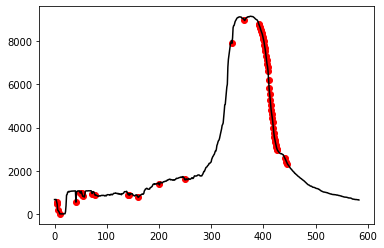

In [598]:
li = plot_min_local("AlphaFold/TCFseul/TCF7L1_97f0c/TCF7L1_97f0c.a3m")

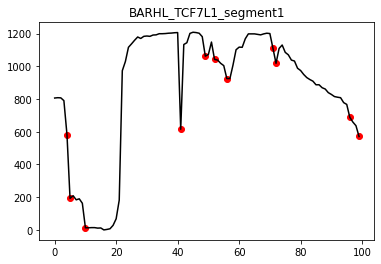

Positions des minimuns locaux :  [ 4  5 10 41 49 52 56 71 72 96 99]


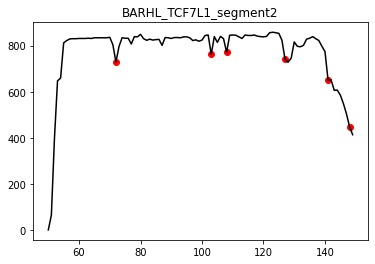

Positions des minimuns locaux :  [ 72 103 108 127 141 148]


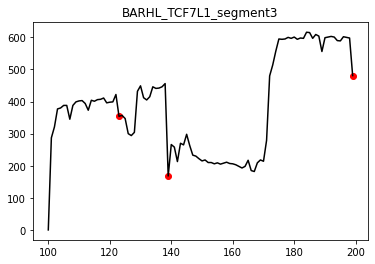

Positions des minimuns locaux :  [123 139 199]


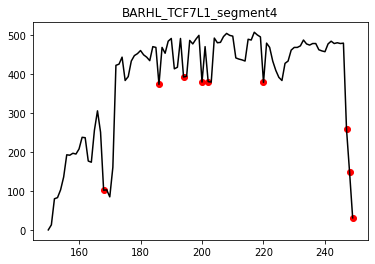

Positions des minimuns locaux :  [168 186 194 200 202 220 247 248 249]


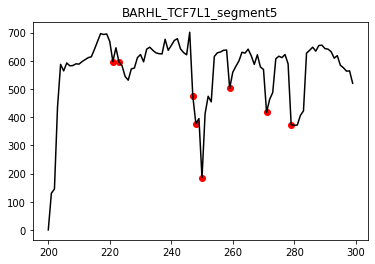

Positions des minimuns locaux :  [221 223 247 248 250 259 271 279]


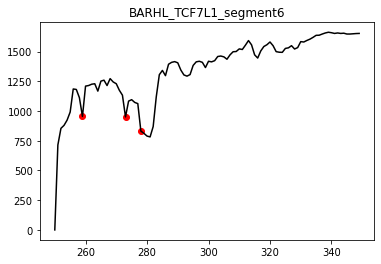

Positions des minimuns locaux :  [259 273 278]


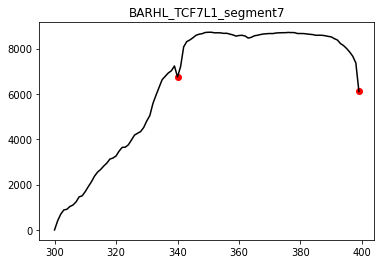

Positions des minimuns locaux :  [340 399]


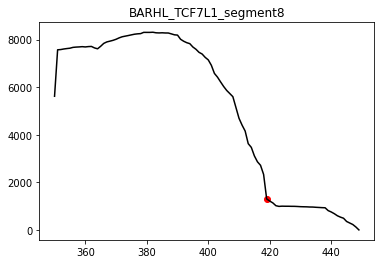

Positions des minimuns locaux :  [419]


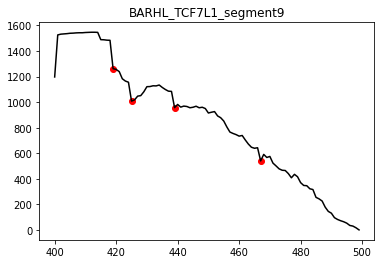

Positions des minimuns locaux :  [419 425 439 467]


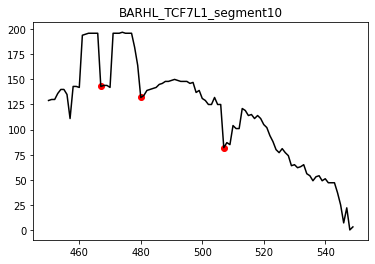

Positions des minimuns locaux :  [467 480 507]


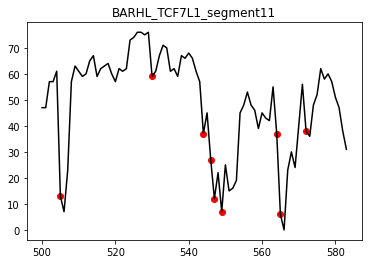

Positions des minimuns locaux :  [505 530 544 546 547 549 564 565 572]


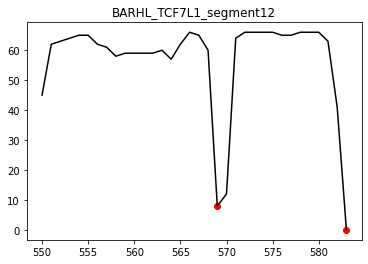

Positions des minimuns locaux :  [569 583]


In [622]:
chemin = "AlphaFold/SegmentTCF_BARHL/a3m_Segments/"
name = "BARHL_TCF7L1_segment"

liste_min = []

liste_seuil_diff = [50, 50, 50, 80, 50, 100, 300, 600, 90, 30, 10, 30]
for i in range(3):
    inter = i*50
    l = plot_min_local(chemin+name+str(i+1)+".a3m", name+str(i+1), inter, liste_seuil_diff[i])
    liste_min.append(l)
    print("Positions des minimuns locaux : ",l)
    